# Pandas Reference Page

Sourced from Jose Portilla's Python for Data Science and Machine Learning Bootcamp on Udemy
***

### Series

In [1]:
import numpy as np
import pandas as pd

In [2]:
labels = ['Alpha', 'Bravo', 'Charlie']
data = [1, 2, 3]
arr = np.array(data)
d = dict(zip(labels, data))

In [3]:
pd.Series(data = data)

0    1
1    2
2    3
dtype: int64

In [4]:
pd.Series(data = data, index = labels)

Alpha      1
Bravo      2
Charlie    3
dtype: int64

In [5]:
pd.Series(d)

Alpha      1
Bravo      2
Charlie    3
dtype: int64

In [6]:
test = pd.Series(d)
print(test[0])
print(test['Bravo'])
print(test[-1])

1
2
3


In [7]:
print(test.keys())

Index(['Alpha', 'Bravo', 'Charlie'], dtype='object')


In [8]:
test2 = test + test
test2

Alpha      2
Bravo      4
Charlie    6
dtype: int64

### DataFrames

In [9]:
from numpy.random import randn

In [10]:
np.random.seed(101)

In [11]:
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [12]:
df['W'] # or df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [13]:
type(df['W'])

pandas.core.series.Series

In [14]:
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [15]:
df['W + Y'] = df['W'] + df['Y']
df

,W,X,Y,Z,W + Y
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [16]:
# Axis = 1 for columns, inplace = True to modify original copy
df.drop('W + Y', axis = 1, inplace = True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [17]:
df.drop('E') # axis = 0 by default, so no need to specify
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [18]:
print(df.shape)

(5, 4)


In [19]:
# Selecting rows
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [20]:
df.iloc[0]

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [21]:
# Select certain indices
df.loc['B','Y']

-0.8480769834036315

In [22]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


In [23]:
booldf = df > 0
booldf

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [24]:
df[booldf]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [25]:
df['W'] > 0

A     True
B     True
C    False
D     True
E     True
Name: W, dtype: bool

In [26]:
df[df['W'] > 0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [27]:
df.reset_index() # Note not calling inplace

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [28]:
newindex = ['CA', 'NY', 'WY', 'OR', 'CO']
df['States'] = newindex
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [29]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [30]:
outside = ['G1', 'G1', 'G1', 'G2', 'G2', 'G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [31]:
df = pd.DataFrame(randn(6,2),hier_index,['A','B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

In [32]:
df.loc['G1']

,A,B
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [33]:
df.loc['G1'].loc[1]

A    0.302665
B    1.693723
Name: 1, dtype: float64

In [34]:
df.index.names = ['Groups', 'Num']
df

A         B
Groups Num                    
G1     1    0.302665  1.693723
       2   -1.706086 -1.159119
       3   -0.134841  0.390528
G2     1    0.166905  0.184502
       2    0.807706  0.072960
       3    0.638787  0.329646

In [35]:
df.loc['G2'].loc[2]['B']

0.07295967531703869

In [36]:
# Cross-section
df.xs('G1')

,A,B
Num,,
1,0.302665,1.693723
2,-1.706086,-1.159119
3,-0.134841,0.390528


In [37]:
df.xs(1,level='Num')

,A,B
Groups,,
G1,0.302665,1.693723
G2,0.166905,0.184502


### Handling Missing Data

In [38]:
d = {'A': [1,2,np.nan], 'B':[5,np.nan,np.nan],'C':[1,2,3]}
df = pd.DataFrame(d)
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [39]:
# Drop NaNs
df.dropna() # drops all rows with NaN

,A,B,C
0,1.0,5.0,1


In [40]:
df.dropna(axis = 1) # drops all columns with NaN

,C
0,1
1,2
2,3


In [41]:
df.dropna(thresh = 2) # threshold for number of NaN values before dropping

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [42]:
df.fillna(0) # Replace all NaNs as some value

,A,B,C
0,1.0,5.0,1
1,2.0,0.0,2
2,0.0,0.0,3


In [43]:
df['A'].fillna(df['A'].mean()) # Replace all NaNs in A column with A column avg

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

### Groupby

Gropuby allows you to group together rows based off of a column and perform an aggregate function on them.

In [44]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
        'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
        'Sales':[200,120,340,124,243,350]}

In [45]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [46]:
byComp = df.groupby('Company')

In [47]:
byComp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [48]:
byComp.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [49]:
byComp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [50]:
byComp.sum().loc['FB']

Sales    593
Name: FB, dtype: int64

In [51]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [52]:
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [53]:
df.groupby('Company').min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [54]:
df.groupby('Company').describe() #.transpose()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

### Merging, Joining, and Concatenating

In [55]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']},
                    index=[0,1,2,3])
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7'],
                    'D':['D4','D5','D6','D7']},
                    index=[4,5,6,7])
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11'],
                    'D':['D8','D9','D10','D11']},
                    index=[8,9,10,11])

In [56]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [57]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [58]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [59]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [60]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [61]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                     'A':['A0','A1','A2','A3'],
                     'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                      'C':['C0','C1','C2','C3'],
                      'D':['D0','D1','D2','D3']})

In [62]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [63]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [64]:
pd.merge(left,right,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


# Joining

In [65]:
left = pd.DataFrame({'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']},
                     index=['K0','K1','K2'])
right = pd.DataFrame({'C':['C0','C2','C3'],
                     'D':['D0','D2','D3']},
                     index=['K0','K2','K3'])

In [66]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [67]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [68]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Operations

In [69]:
df = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [70]:
df['col2'].unique()

array([444, 555, 666])

In [71]:
df['col2'].nunique()

3

In [72]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [73]:
df['col1'].apply(lambda x: x*2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [74]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [75]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [76]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [77]:
df.sort_values('col2')

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


In [78]:
df.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


#### Pivot Tables

In [79]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
        'B':['one','one','two','two','one','one'],
        'C':['x','y','x','y','x','y'],
        'D':[1,3,2,5,4,1]}
df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [80]:
df.pivot_table(values='D',index=['A','B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Data Input and Output

IO with CSV, XLS, HTML, and SQL

Required dependencies: sqlalchemy, lxml, html5lib, BeautifulSoup4

In [81]:
#df = pd.read_csv('example.csv')

#df.to_csv('output', index=False)

In [82]:
#pd.read_excel('sample.xlsx', sheetname='Sheet1')

#df.to_excel('sample2.xlsx', sheet_name='NewSheet')

In [83]:
# data = pd.read_html('https://github.com/0elo')

In [84]:
# from sqlalchemy import create_engine
# engine = create_engine('sqlite:///:memory:')
# df.to_sql('my_table',engine)
# sqldf = pd.read_sql('my_table',con=engine)

### Built-in Data Visualization

In [85]:
import seaborn as sns
%matplotlib inline

In [86]:
df1 = pd.read_csv('df1',index_col=0)
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [87]:
df2 = pd.read_csv('df2')
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


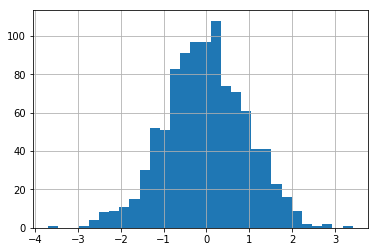

In [88]:
df1['A'].hist(bins=30)

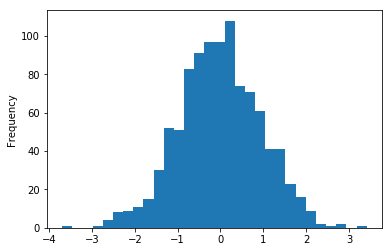

In [89]:
df1['A'].plot(kind='hist',bins=30)

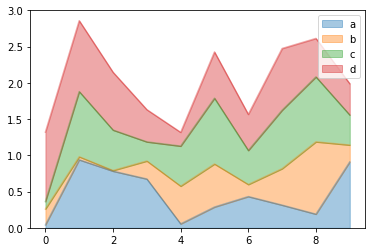

In [90]:
df2.plot.area(alpha=0.4)

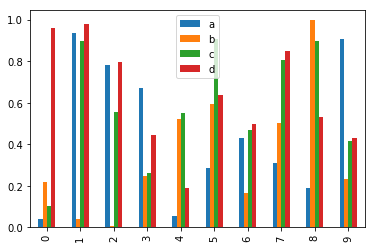

In [91]:
df2.plot.bar()

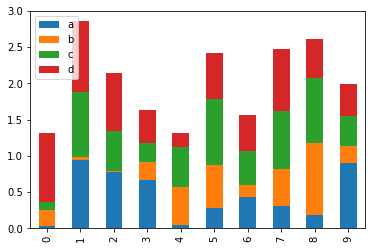

In [92]:
df2.plot.bar(stacked=True)

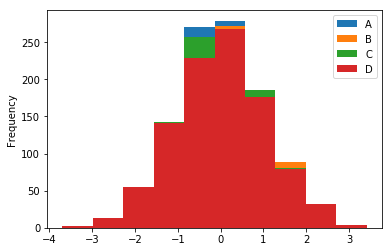

In [93]:
df1.plot.hist()

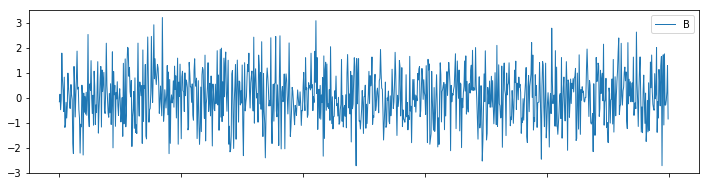

In [94]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

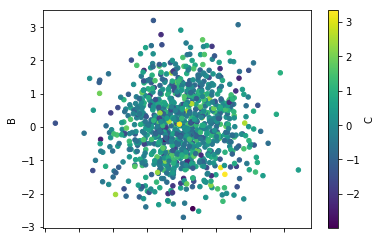

In [95]:
df1.plot.scatter(x='A',y='B',c='C',cmap='viridis')

/home/kevin/env/jupyterML/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


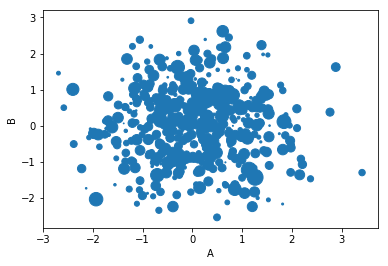

In [96]:
df1.plot.scatter(x='A',y='B',s=df1['C']*75)

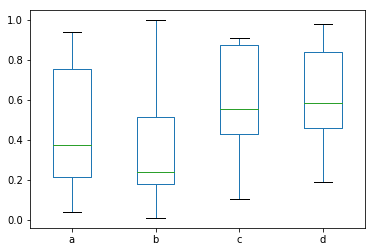

In [97]:
df2.plot.box()

In [98]:
df = pd.DataFrame(np.random.randn(1000,2),columns=['a','b'])

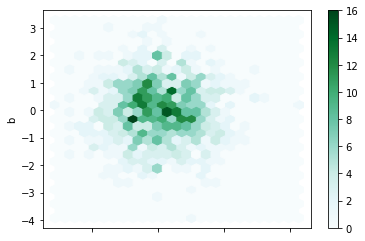

In [99]:
df.plot.hexbin(x='a',y='b',gridsize=25)

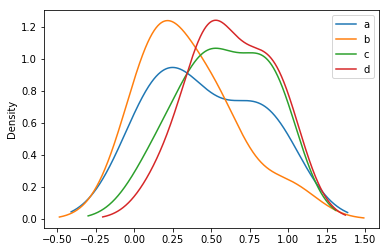

In [100]:
df2.plot.density()

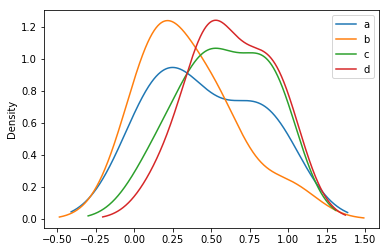

In [101]:
df2.plot.kde()